In [1]:
from IES.mpc_env.StationOptEnv import EnergyHubEnv
from IES.agent.mpc import MPC_Controller
import numpy as np
import matplotlib.pyplot as plt

In [2]:
components = ['power_market', 'solar_generation', 'non_shiftable_load', 'heating_demand', 'electrical_storage', 'heating_storage', 'hydrogen_storage', 'hour', 'direct_solar_irradiance', 'absorption_chiller']

In [3]:
station_id = 'Building_5'
DATASET_NAME = 'citylearn_challenge_2021'
component = None
DAY_COUNT = 20
simulation_start_time_step = 24
simulation_end_time_step = 24 * DAY_COUNT + simulation_start_time_step

In [4]:
env = EnergyHubEnv(components=component, DATASET_NAME=DATASET_NAME, station_id=station_id,  simulation_start_time_step=simulation_start_time_step, simulation_end_time_step=simulation_end_time_step)

In [5]:
env.energy_simulation.observations

['month',
 'hour',
 'day_type',
 'daylight_savings_status',
 'indoor_dry_bulb_temperature',
 'average_unmet_cooling_setpoint_difference',
 'indoor_relative_humidity',
 'non_shiftable_load',
 'dhw_demand',
 'cooling_demand',
 'heating_demand',
 'solar_generation']

In [6]:
env.energy_simulation.non_shiftable_load.shape

(504,)

In [7]:
env.weather.observations

['outdoor_dry_bulb_temperature',
 'outdoor_relative_humidity',
 'diffuse_solar_irradiance',
 'direct_solar_irradiance',
 'outdoor_dry_bulb_temperature_predicted_1',
 'outdoor_dry_bulb_temperature_predicted_2',
 'outdoor_dry_bulb_temperature_predicted_3',
 'outdoor_relative_humidity_predicted_1',
 'outdoor_relative_humidity_predicted_2',
 'outdoor_relative_humidity_predicted_3',
 'diffuse_solar_irradiance_predicted_1',
 'diffuse_solar_irradiance_predicted_2',
 'diffuse_solar_irradiance_predicted_3',
 'direct_solar_irradiance_predicted_1',
 'direct_solar_irradiance_predicted_2',
 'direct_solar_irradiance_predicted_3']

In [8]:
mpc_controller = MPC_Controller(env, pred_horizon=12)

In [9]:
env.reset()

In [10]:
env.components

{'power_market': {'active': True},
 'hydrogen_market': {'active': True},
 'solar_generation': {'active': True},
 'direct_solar_irradiance': {'active': True},
 'non_shiftable_load': {'active': True},
 'heating_demand': {'active': True},
 'cooling_demand': {'active': True},
 'electrical_storage': {'active': True},
 'hydrogen_storage': {'active': True},
 'heating_storage': {'active': True},
 'cooling_storage': {'active': True},
 'absorption_chiller': {'active': True}}

In [11]:
result = []
obj = []

In [12]:
done = False
while not done:
    actions = mpc_controller.run()
    states, reward, done, _ = env.step(actions)
    result.append(states)
    obj.append(reward)

In [13]:
obj

[24.967347229999998,
 22.5856513961192,
 44.157414351999996,
 38.6868708592221,
 30.421377847305568,
 22.842574216000003,
 18.32612075803869,
 14.346222133400001,
 15.303294799254944,
 11.688161724315584,
 0.0,
 0.0,
 0.0,
 0.0,
 14.311952336075294,
 15.788298092571218,
 28.537065881198732,
 17.271878490300036,
 40.833334388,
 31.67981350805889,
 39.445826688000004,
 28.977134149999998,
 17.614730063077854,
 32.620878298,
 32.978229648,
 25.264600184,
 24.976187148,
 24.004291337999987,
 25.400300577473686,
 27.618022349999997,
 15.798994104122261,
 24.396785721699988,
 0.0,
 0.0,
 0.0,
 0.0,
 4.718657279768663,
 0.0,
 0.0,
 1.6644095643845993,
 14.2291183947218,
 10.484088741221669,
 21.555361715900048,
 29.521741061900038,
 32.79534219015722,
 26.236148992,
 35.612377007999996,
 29.602564448,
 26.991807322,
 23.80335811389474,
 23.195407914,
 23.246489146,
 31.509360688000005,
 18.805234168,
 42.385340548,
 24.569748805500048,
 0.0,
 0.0,
 0.0,
 0.0,
 2.724324136457224,
 2.1447367755

In [ ]:
# 决策
P_g_buy = env.power_market.traces.P_g_buy
P_g_sell = env.power_market.traces.P_g_sell

P_bssc = env.electrical_storage.traces.P_bssc
P_bssd = env.electrical_storage.traces.P_bssd

g_tesc = env.heating_storage.traces.g_tesc
g_tesd = env.heating_storage.traces.g_tesd

q_cssc = env.cooling_storage.traces.q_cssc
q_cssd = env.cooling_storage.traces.q_cssd

P_el   = env.hydrogen_storage.traces.P_el
P_fc   = env.hydrogen_storage.traces.P_fc

g_ac   = env.absorption_chiller.traces.g_AC
hydr_purc = env.hydrogen_market.traces.hydr_purc

In [15]:
np.savez('result.npz', P_g_buy = P_g_buy, P_g_sell=P_g_sell, P_bssc=P_bssc, P_bssd=P_bssd, g_tesc=g_tesc, g_tesd=g_tesd, q_cssc=q_cssc, q_cssd=q_cssd, P_el=P_el, P_fc=P_fc, g_ac=g_ac, hydr_purc=hydr_purc, soc_hyd = env.hydrogen_storage.traces.soc)

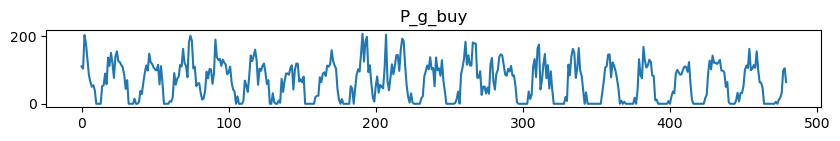

In [27]:
plt.figure(figsize=(10, 1))
plt.plot(env.power_market.traces.P_g_buy)
plt.title('P_g_buy')
plt.show()

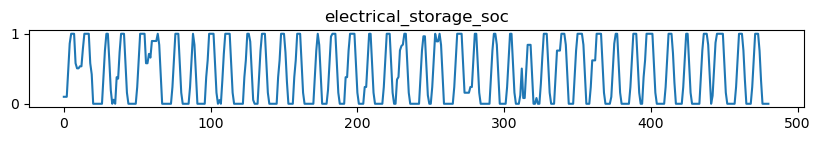

In [28]:
plt.figure(figsize=(10, 1))
plt.plot(env.electrical_storage.traces['soc'])
plt.title('electrical_storage_soc')
plt.show()

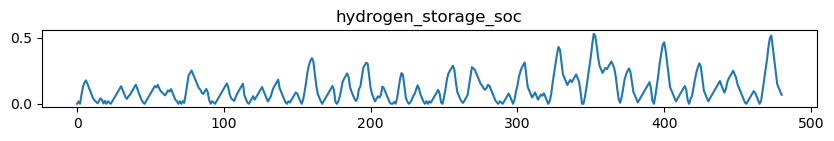

In [29]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_storage.traces['soc'])
plt.title('hydrogen_storage_soc')
plt.show()

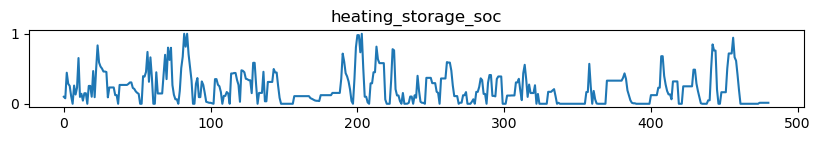

In [30]:
plt.figure(figsize=(10, 1))
plt.plot(env.heating_storage.traces['soc'])
plt.title('heating_storage_soc')
plt.show()

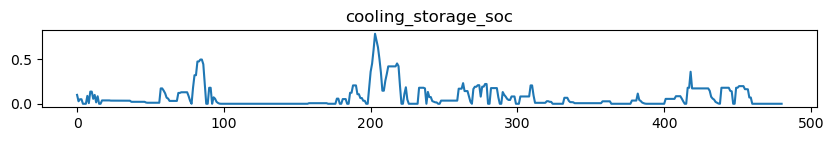

In [31]:
plt.figure(figsize=(10, 1))
plt.plot(env.cooling_storage.traces['soc'])
plt.title('cooling_storage_soc')
plt.show()

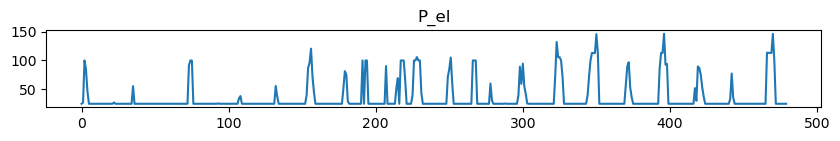

In [32]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_storage.traces.P_el)
plt.title('P_el')
plt.show()

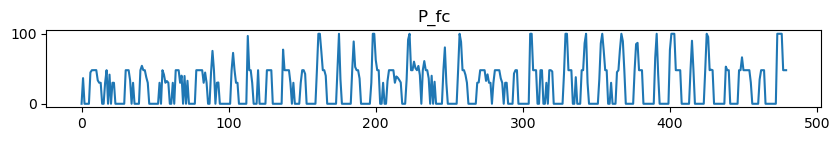

In [33]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_storage.traces.P_fc)
plt.title('P_fc')
plt.show()

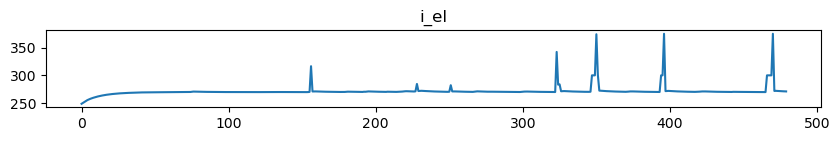

In [34]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_storage.traces.i_el)
plt.title('i_el')
plt.show()

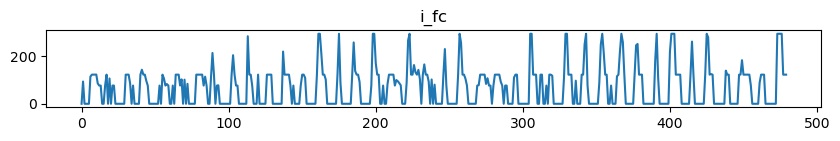

In [35]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_storage.traces.i_fc)
plt.title('i_fc')
plt.show()

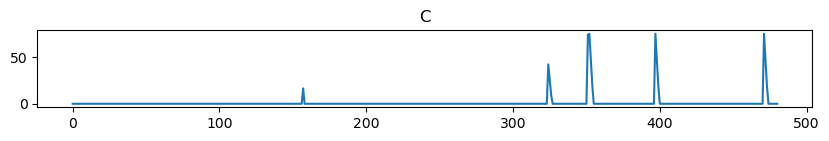

In [36]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_storage.traces.C)
plt.title('C')
plt.show()

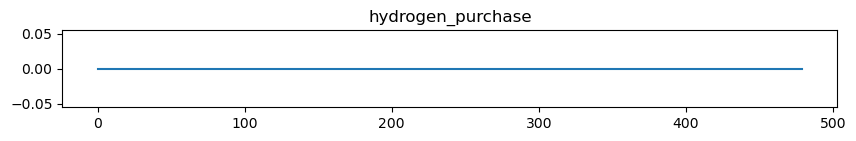

In [37]:
plt.figure(figsize=(10, 1))
plt.plot(env.hydrogen_market.traces.hydr_purc)
plt.title('hydrogen_purchase')
plt.show()